In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import math as m
%matplotlib inline

import torch
import torchvision

import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random

from torch.utils.data import Dataset, DataLoader
from mpl_toolkits.mplot3d import Axes3D

In [44]:
# point  = np.array([1, 2, 3])
# normal = np.array([1, 1, 2])

# point2 = np.array([10, 50, 50])

# # a plane is a*x+b*y+c*z+d=0
# # [a,b,c] is the normal. Thus, we have to calculate
# # d and we're set
# d = -point.dot(normal)

# # create x,y
# xx, yy = np.meshgrid(range(10), range(10))

# # calculate corresponding z
# z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# # plot the surface
# plt3d = plt.figure().gca(projection='3d')
# plt3d.plot_surface(xx, yy, z, alpha=1)

# ax = plt.gca()
# #and i would like to plot this point : 
# ax.scatter(point2[0] , point2[1] , point2[2],  color='green')

# plt.show()

In [45]:
# # plot the surface
# plt3d = plt.figure().gca(projection='3d')
# plt3d.plot_surface(xx, yy, z, alpha=0.2)

# # Ensure that the next plot doesn't overwrite the first plot
# ax = plt.gca()
# # ax.hold(True)

# ax.scatter(points2[0], point2[1], point2[2], color='green')

In [46]:
y = np.random.randint(0,10,1000)
idx= []
for i in range(10):
    print(i,sum(y==i))
    idx.append(y==i) 
x = np.zeros((1000,2))

x0=x[idx[0],:] = np.random.multivariate_normal(mean = [2,2],cov=[[0.01,0],[0,0.01]],size=sum(idx[0]))


x[idx[1],:] = np.random.multivariate_normal(mean = [0,-2],cov=[[0.01,0],[0,0.01]],size=sum(idx[1]))


x[idx[2],:] = np.random.multivariate_normal(mean = [-2,2],cov=[[0.01,0],[0,0.01]],size=sum(idx[2]))



x[idx[3],:] = np.random.multivariate_normal(mean = [0,0],cov=[[0.01,0],[0,0.01]],size=sum(idx[3]))


x[idx[4],:] = np.random.multivariate_normal(mean =[-2,-4] ,cov=[[0.01,0],[0,0.01]],size=sum(idx[4]))



x[idx[5],:] = np.random.multivariate_normal(mean = [2,-4],cov=[[0.01,0],[0,0.01]],size=sum(idx[5]))


x[idx[6],:] = np.random.multivariate_normal(mean = [-4,0],cov=[[0.01,0],[0,0.01]],size=sum(idx[6]))


x[idx[7],:] = np.random.multivariate_normal(mean = [-2,4],cov=[[0.01,0],[0,0.01]],size=sum(idx[7]))


x[idx[8],:] = np.random.multivariate_normal(mean = [2,4],cov=[[0.01,0],[0,0.01]],size=sum(idx[8]))


x[idx[9],:] = np.random.multivariate_normal(mean = [4,0],cov=[[0.01,0],[0,0.01]],size=sum(idx[9]))

idx= []
for i in range(10):
    #print(i,sum(y==i))
    idx.append(y==i)

0 101
1 91
2 106
3 91
4 91
5 96
6 114
7 101
8 110
9 99


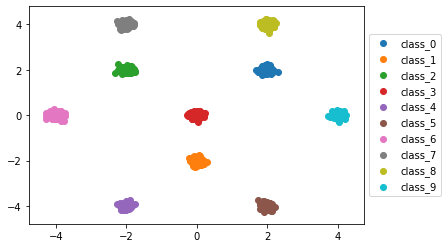

In [47]:
for i in range(10):
    plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [48]:
z = np.zeros((1000,1))
x = np.concatenate((x, z) , axis =1)
x

array([[-1.8762441 ,  1.87705422,  0.        ],
       [-0.23992061, -0.04292365,  0.        ],
       [-2.02876883,  2.00085988,  0.        ],
       ...,
       [ 1.75253051,  1.98739375,  0.        ],
       [-2.04032608, -4.07231535,  0.        ],
       [-0.02069437, -2.10614477,  0.        ]])

In [49]:
x.shape

(1000, 3)

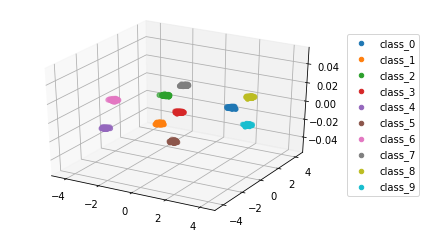

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    ax.scatter(x[idx[i],0],x[idx[i],1],x[idx[i],2],label="class_"+str(i))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

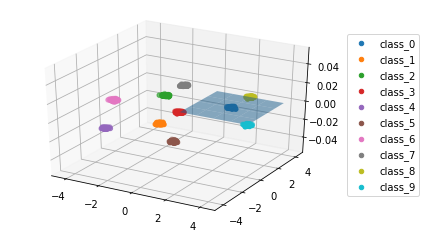

In [51]:
normal = np.array([0,0,1])
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = 0

# create x,y
xx, yy = np.meshgrid(range(5), range(5))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.5)

# fig = plt.figure()
ax = plt.gca()
for i in range(10):
    ax.scatter(x[idx[i],0],x[idx[i],1],x[idx[i],2],label="class_"+str(i))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## angle = pi/2, p1: z = 0, p2: 2x + 3y = 0
## angle = pi/6, p1: z = 0, p2: 2x + 3y + sqrt(39)z = 0
## angle = pi/3, p1: z = 0, p2: 2x + 3y + sqrt(13/3)z = 0

In [52]:
angle = np.pi/4
angle
a = 2
b = 3
if(angle == np.pi/2):
    c=0
else:
    c = np.sqrt(a*a + b*b )/m.tan(angle)
print(c)

-2.0816659994661313


In [53]:
x[idx[0],:]

array([[2.08428544, 2.02457957, 0.        ],
       [2.00140905, 1.9552484 , 0.        ],
       [1.93216217, 1.93693207, 0.        ],
       [2.029092  , 2.01910873, 0.        ],
       [1.86450837, 1.97422274, 0.        ],
       [1.96448121, 1.94383776, 0.        ],
       [2.0111606 , 1.97487998, 0.        ],
       [2.00619666, 1.96232258, 0.        ],
       [2.17859399, 1.94839989, 0.        ],
       [1.68575108, 2.00517189, 0.        ],
       [1.84353841, 2.00525088, 0.        ],
       [2.05022635, 2.0730357 , 0.        ],
       [2.05611253, 1.86131997, 0.        ],
       [2.08252436, 2.03910608, 0.        ],
       [1.87356332, 2.18453267, 0.        ],
       [1.90500562, 1.98675058, 0.        ],
       [2.04595418, 1.9302237 , 0.        ],
       [1.82521617, 1.98731507, 0.        ],
       [1.92812935, 1.96719305, 0.        ],
       [2.00822276, 2.16658937, 0.        ],
       [1.93322097, 1.89444715, 0.        ],
       [2.05387105, 2.08922825, 0.        ],
       [2.

In [54]:
x[idx[0],2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
if(angle == np.pi/2):
    for i in range(3):
        x[idx[i],2] = (i+2)*(x[idx[i],0] + x[idx[i],1])/(x[idx[i],0] + x[idx[i],1])
else:
    for i in range(3):
        x[idx[i],2] = (2*x[idx[i],0] + 3*x[idx[i],1])/c


In [56]:
x[idx[0],:]

array([[ 2.08428544,  2.02457957, -4.92024637],
       [ 2.00140905,  1.9552484 , -4.74070447],
       [ 1.93216217,  1.93693207, -4.64777758],
       [ 2.029092  ,  2.01910873, -4.85933392],
       [ 1.86450837,  1.97422274, -4.63651949],
       [ 1.96448121,  1.94383776, -4.68878087],
       [ 2.0111606 ,  1.97487998, -4.77836556],
       [ 2.00619666,  1.96232258, -4.75549922],
       [ 2.17859399,  1.94839989, -4.9010685 ],
       [ 1.68575108,  2.00517189, -4.50937751],
       [ 1.84353841,  2.00525088, -4.6610885 ],
       [ 2.05022635,  2.0730357 , -4.95735617],
       [ 2.05611253,  1.86131997, -4.6578966 ],
       [ 2.08252436,  2.03910608, -4.93948931],
       [ 1.87356332,  2.18453267, -4.94830806],
       [ 1.90500562,  1.98675058, -4.69348252],
       [ 2.04595418,  1.9302237 , -4.74743762],
       [ 1.82521617,  1.98731507, -4.61763681],
       [ 1.92812935,  1.96719305, -4.68751369],
       [ 2.00822276,  2.16658937, -5.05182562],
       [ 1.93322097,  1.89444715, -4.587

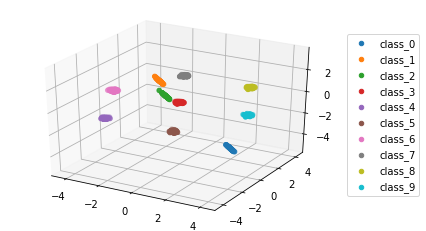

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    ax.scatter(x[idx[i],0],x[idx[i],1],x[idx[i],2],label="class_"+str(i))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

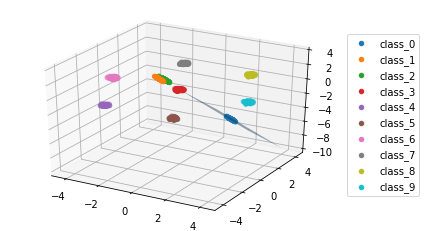

In [58]:
normal = np.array([a,b,c])
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = 0

# create x,y
xx, yy = np.meshgrid(range(5), range(5))

# calculate corresponding z
z = -(-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.5)

# fig = plt.figure()
ax = plt.gca()
for i in range(10):
    ax.scatter(x[idx[i],0],x[idx[i],1],x[idx[i],2],label="class_"+str(i))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [59]:
# true_data = 30
# true_class_size = int(true_data/2)
# corruption_size = 240
# corrupted_class_size = int(corruption_size/8)

# x0 = np.random.uniform(low=[2,1.5], high = [2.5,2],size =(true_class_size,2) )
# x1 = np.random.uniform(low=[2.5,2], high = [3,2.5],size =(true_class_size,2) )

# x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(corrupted_class_size,2))
# x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(corrupted_class_size,2))

# x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(corrupted_class_size,2))
# x5 = np.random.uniform(low = [0,0] , high = [1,1],size=(corrupted_class_size,2))

# x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(corrupted_class_size,2))
# x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(corrupted_class_size,2))

# x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(corrupted_class_size,2))
# x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(corrupted_class_size,2))



In [60]:
# z = np.zeros((true_class_size,1))
# x0 = np.concatenate((x0, z) , axis =1)
# x1 = np.concatenate((x1, z) , axis =1)

# z= np.zeros((corrupted_class_size,1))

# x2 = np.concatenate((x2, z) , axis =1)
# x3 = np.concatenate((x3, z) , axis =1)

# x4 = np.concatenate((x4, z) , axis =1)

# x5 = np.concatenate((x5, z) , axis =1)

# x6 = np.concatenate((x6, z) , axis =1)

# x7 = np.concatenate((x7, z) , axis =1)

# x8 = np.concatenate((x8, z) , axis =1)

# x9 = np.concatenate((x9, z) , axis =1)

In [61]:
# x0.shape , x1.shape , x2.shape, x3.shape


In [62]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# # ax = plt.gca()
# ax.scatter(x0[:,0], x0[:, 1], x0[:,2])
# ax.scatter(x1[:,0],x1[:,1], x1[:,2])
# ax.scatter(x2[:,0],x2[:,1], x2[:,2])
# ax.scatter(x3[:,0],x3[:,1], x3[:,2])
# ax.scatter(x4[:,0],x4[:,1], x4[:,2])
# ax.scatter(x5[:,0],x5[:,1], x5[:,2])
# ax.scatter(x6[:,0],x6[:,1], x6[:,2])
# ax.scatter(x7[:,0],x7[:,1], x7[:,2])
# ax.scatter(x8[:,0],x8[:,1], x8[:,2])
# ax.scatter(x9[:,0],x9[:,1], x9[:,2])

In [63]:
# import plotly.express as px
# fig = px.scatter_3d(x0, x='sepal_length', y='sepal_width', z='petal_width',
#                     color='petal_length', symbol='species')
# fig.show()



In [65]:
x.shape,y.shape

((1000, 3), (1000,))

In [81]:
classes  = ('0', '1', '2','3', '4', '5', '6', '7','8', '9')
foreground_classes = {'0', '1', '2'}

background_classes = {'3', '4', '5', '6', '7','8', '9'}


In [82]:
class sub_clust_data(Dataset):
    def __init__(self,x, y):
        self.x = torch.Tensor(x)
        self.y = torch.Tensor(y).type(torch.LongTensor)
    #self.fore_idx = fore_idx
    
    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.x[idx] , self.y[idx] #, self.fore_idx[idx]

In [83]:
trainset = sub_clust_data(x,y)

In [84]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)

In [86]:
dataiter = iter(trainloader)
background_data=[]
background_label=[]
foreground_data=[]
foreground_label=[]
batch_size=10

for i in range(100):   #5000*batch_size = 50000 data points
    images, labels = dataiter.next()
    for j in range(batch_size):
        if(classes[labels[j]] in background_classes):
            img = images[j].tolist()
            background_data.append(img)
            background_label.append(labels[j])
        else:
            img = images[j].tolist()
            foreground_data.append(img)
            foreground_label.append(labels[j])

In [90]:
np.shape(foreground_data),np.shape(foreground_label)

((298, 3), (298,))

In [91]:
np.shape(background_data),np.shape(background_label)

((702, 3), (702,))

In [92]:
foreground_data = torch.tensor(foreground_data)
foreground_label = torch.tensor(foreground_label).type(torch.LongTensor)
background_data = torch.tensor(background_data)
background_label = torch.tensor(background_label).type(torch.LongTensor)

In [93]:
def create_mosaic_img(bg_idx,fg_idx,fg): 
    image_list=[]
    j=0
    for i in range(9):
        if i != fg:
            image_list.append(background_data[bg_idx[j]].type("torch.DoubleTensor"))
            j+=1
        else: 
            image_list.append(foreground_data[fg_idx].type("torch.DoubleTensor"))
            label = foreground_label[fg_idx]  #-7  # minus 7 because our fore ground classes are 7,8,9 but we have to store it as 0,1,2
    #image_list = np.concatenate(image_list ,axis=0)
    image_list = torch.stack(image_list) 
    return image_list,label

In [96]:
desired_num = 1000
mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
for i in range(desired_num):
    bg_idx = np.random.randint(0,702,8)
    fg_idx = np.random.randint(0,298)
    fg = np.random.randint(0,9)
    fore_idx.append(fg)
    image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
    mosaic_list_of_images.append(image_list)
    mosaic_label.append(label)

In [98]:
def create_avg_image_from_mosaic_dataset(mosaic_dataset,labels,foreground_index,dataset_number):
    avg_image_dataset = []
    for i in range(len(mosaic_dataset)):
        img = torch.zeros([3], dtype=torch.float64)
        for j in range(9):
            if j == foreground_index[i]:
                img = img + mosaic_dataset[i][j]*dataset_number/9
            else :
                img = img + mosaic_dataset[i][j]*(9-dataset_number)/(8*9)
    
        avg_image_dataset.append(img)
    
    return avg_image_dataset , labels , foreground_index

In [99]:
avg_image_dataset_1 , labels_1,  fg_index_1 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 1)
avg_image_dataset_2 , labels_2,  fg_index_2 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 2)
avg_image_dataset_3 , labels_3,  fg_index_3 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 3)
avg_image_dataset_4 , labels_4,  fg_index_4 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 4)
avg_image_dataset_5 , labels_5,  fg_index_5 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 5)
avg_image_dataset_6 , labels_6,  fg_index_6 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 6)
avg_image_dataset_7 , labels_7,  fg_index_7 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 7)
avg_image_dataset_8 , labels_8,  fg_index_8 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 8)
avg_image_dataset_9 , labels_9,  fg_index_9 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 9)

#test_dataset_10 , labels_10 , fg_index_10 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[10000:20000], mosaic_label[10000:20000], fore_idx[10000:20000] , 9)

In [103]:
class MosaicDataset(Dataset):
    """MosaicDataset dataset."""

    def __init__(self, mosaic_list_of_images, mosaic_label):
        """
          Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.mosaic = mosaic_list_of_images
        self.label = mosaic_label
        #self.fore_idx = fore_idx
    
    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        return self.mosaic[idx] , self.label[idx] #, self.fore_idx[idx]

In [106]:
batch = 256


# training_data = avg_image_dataset_5    #just change this and training_label to desired dataset for training
# training_label = labels_5

traindata_1 = MosaicDataset(avg_image_dataset_1, labels_1 )
trainloader_1 = DataLoader( traindata_1 , batch_size= batch ,shuffle=True)

traindata_2 = MosaicDataset(avg_image_dataset_2, labels_2 )
trainloader_2 = DataLoader( traindata_2 , batch_size= batch ,shuffle=True)

traindata_3 = MosaicDataset(avg_image_dataset_3, labels_3 )
trainloader_3 = DataLoader( traindata_3 , batch_size= batch ,shuffle=True)

traindata_4 = MosaicDataset(avg_image_dataset_4, labels_4 )
trainloader_4 = DataLoader( traindata_4 , batch_size= batch ,shuffle=True)

traindata_5 = MosaicDataset(avg_image_dataset_5, labels_5 )
trainloader_5 = DataLoader( traindata_5 , batch_size= batch ,shuffle=True)

traindata_6 = MosaicDataset(avg_image_dataset_6, labels_6 )
trainloader_6 = DataLoader( traindata_6 , batch_size= batch ,shuffle=True)

traindata_7 = MosaicDataset(avg_image_dataset_7, labels_7 )
trainloader_7 = DataLoader( traindata_7 , batch_size= batch ,shuffle=True)

traindata_8 = MosaicDataset(avg_image_dataset_8, labels_8 )
trainloader_8 = DataLoader( traindata_8 , batch_size= batch ,shuffle=True)

traindata_9 = MosaicDataset(avg_image_dataset_9, labels_9 )
trainloader_9 = DataLoader( traindata_9 , batch_size= batch ,shuffle=True)

testdata_1 = MosaicDataset(avg_image_dataset_1, labels_1 )
testloader_1 = DataLoader( testdata_1 , batch_size= batch ,shuffle=False)

testdata_2 = MosaicDataset(avg_image_dataset_2, labels_2 )
testloader_2 = DataLoader( testdata_2 , batch_size= batch ,shuffle=False)

testdata_3 = MosaicDataset(avg_image_dataset_3, labels_3 )
testloader_3 = DataLoader( testdata_3 , batch_size= batch ,shuffle=False)

testdata_4 = MosaicDataset(avg_image_dataset_4, labels_4 )
testloader_4 = DataLoader( testdata_4 , batch_size= batch ,shuffle=False)

testdata_5 = MosaicDataset(avg_image_dataset_5, labels_5 )
testloader_5 = DataLoader( testdata_5 , batch_size= batch ,shuffle=False)

testdata_6 = MosaicDataset(avg_image_dataset_6, labels_6 )
testloader_6 = DataLoader( testdata_6 , batch_size= batch ,shuffle=False)

testdata_7 = MosaicDataset(avg_image_dataset_7, labels_7 )
testloader_7 = DataLoader( testdata_7 , batch_size= batch ,shuffle=False)

testdata_8 = MosaicDataset(avg_image_dataset_8, labels_8 )
testloader_8 = DataLoader( testdata_8 , batch_size= batch ,shuffle=False)

testdata_9 = MosaicDataset(avg_image_dataset_9, labels_9 )
testloader_9 = DataLoader( testdata_9 , batch_size= batch ,shuffle=False)



In [107]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(3,64)
        self.linear2 = nn.Linear(64,128)
        
        self.linear3 = nn.Linear(128,3)
        
    def forward(self,x):
        x = F.relu(self.linear1(x))
        
        x = F.relu(self.linear2(x))
        
        x = self.linear3(x)
        
        return x

In [109]:
def test_all(number, testloader,inc):
    correct = 0
    total = 0
    out = []
    pred = []
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to("cuda"),labels.to("cuda")
            out.append(labels.cpu().numpy())
            outputs= inc(images)
            _, predicted = torch.max(outputs.data, 1)
            pred.append(predicted.cpu().numpy())
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 1000 test dataset %d: %d %%' % (number , 100 * correct / total))

In [121]:
def train_all(trainloader, ds_number, testloader_list):
    
    print("--"*40)
    print("training on data set  ", ds_number)
    
    inc = Net().double()
    inc = inc.to("cuda")
    
    criterion_inception = nn.CrossEntropyLoss()
    optimizer_inception = optim.SGD(inc.parameters(), lr=0.01, momentum=0.9)
    
    acti = []
    loss_curi = []
    epochs = 70
    
    for epoch in range(epochs): # loop over the dataset multiple times
        ep_lossi = []

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            inputs, labels = inputs.to("cuda"),labels.to("cuda")

            # zero the parameter gradients
            optimizer_inception.zero_grad()

            # forward + backward + optimize
            outputs = inc(inputs)
            loss = criterion_inception(outputs, labels)
            loss.backward()
            optimizer_inception.step()

            # print statistics
            running_loss += loss.item()
            mini=4
            if i % mini == mini-1:    # print every 10 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / mini))
                ep_lossi.append(running_loss/mini) # loss per minibatch
                running_loss = 0.0
        
        if(np.mean(ep_lossi)<=0.01):
            break
        loss_curi.append(np.mean(ep_lossi))   #loss per epoch
    #     if (epoch%5 == 0):
    #         _,actis= inc(inputs)
    #         acti.append(actis)



    print('Finished Training')
#     torch.save(inc.state_dict(),"/content/drive/My Drive/Research/Experiments on CIFAR mosaic/Exp_2_Attention_models_on_9_datasets_made_from_10k_mosaic/weights/train_dataset_"+str(ds_number)+"_"+str(epochs)+".pt")
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            images, labels = images.to("cuda"), labels.to("cuda")
            outputs = inc(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 train images: %d %%' % (  100 * correct / total))
    
    for i, j in enumerate(testloader_list):
        test_all(i+1, j,inc)
    
    print("--"*40)
    
    return loss_curi

In [122]:
train_loss_all=[]

testloader_list= [ testloader_1, testloader_2, testloader_3, testloader_4, testloader_5, testloader_6,
                 testloader_7, testloader_8, testloader_9]

train_loss_all.append(train_all(trainloader_1, 1, testloader_list))
train_loss_all.append(train_all(trainloader_2, 2, testloader_list))
train_loss_all.append(train_all(trainloader_3, 3, testloader_list))
train_loss_all.append(train_all(trainloader_4, 4, testloader_list))
train_loss_all.append(train_all(trainloader_5, 5, testloader_list))
train_loss_all.append(train_all(trainloader_6, 6, testloader_list))
train_loss_all.append(train_all(trainloader_7, 7, testloader_list))
train_loss_all.append(train_all(trainloader_8, 8, testloader_list))
train_loss_all.append(train_all(trainloader_9, 9, testloader_list))

--------------------------------------------------------------------------------
training on data set   1
[1,     4] loss: 1.109
[2,     4] loss: 1.094
[3,     4] loss: 1.074
[4,     4] loss: 1.054
[5,     4] loss: 1.035
[6,     4] loss: 1.017
[7,     4] loss: 0.997
[8,     4] loss: 0.977
[9,     4] loss: 0.954
[10,     4] loss: 0.931
[11,     4] loss: 0.907
[12,     4] loss: 0.880
[13,     4] loss: 0.854
[14,     4] loss: 0.824
[15,     4] loss: 0.793
[16,     4] loss: 0.758
[17,     4] loss: 0.724
[18,     4] loss: 0.687
[19,     4] loss: 0.650
[20,     4] loss: 0.611
[21,     4] loss: 0.572
[22,     4] loss: 0.536
[23,     4] loss: 0.499
[24,     4] loss: 0.465
[25,     4] loss: 0.432
[26,     4] loss: 0.401
[27,     4] loss: 0.371
[28,     4] loss: 0.342
[29,     4] loss: 0.316
[30,     4] loss: 0.291
[31,     4] loss: 0.268
[32,     4] loss: 0.245
[33,     4] loss: 0.225
[34,     4] loss: 0.206
[35,     4] loss: 0.188
[36,     4] loss: 0.171
[37,     4] loss: 0.157
[38,     4] los

[43,     4] loss: 0.015
[44,     4] loss: 0.015
[45,     4] loss: 0.015
[46,     4] loss: 0.014
[47,     4] loss: 0.014
[48,     4] loss: 0.014
[49,     4] loss: 0.013
[50,     4] loss: 0.013
[51,     4] loss: 0.013
[52,     4] loss: 0.013
[53,     4] loss: 0.012
[54,     4] loss: 0.012
[55,     4] loss: 0.012
[56,     4] loss: 0.011
[57,     4] loss: 0.011
[58,     4] loss: 0.011
[59,     4] loss: 0.011
[60,     4] loss: 0.011
[61,     4] loss: 0.010
[62,     4] loss: 0.010
[63,     4] loss: 0.010
[64,     4] loss: 0.010
[65,     4] loss: 0.010
Finished Training
Accuracy of the network on the 10000 train images: 99 %
Accuracy of the network on the 1000 test dataset 1: 53 %
Accuracy of the network on the 1000 test dataset 2: 78 %
Accuracy of the network on the 1000 test dataset 3: 96 %
Accuracy of the network on the 1000 test dataset 4: 99 %
Accuracy of the network on the 1000 test dataset 5: 100 %
Accuracy of the network on the 1000 test dataset 6: 100 %
Accuracy of the network on the